# DMN and Working Memory in Human Connectome Project (HCP) Dataset

The HCP dataset comprises resting-state and task-based fMRI from a large sample of human subjects. The NMA-curated dataset includes time series data that has been preprocessed and spatially-downsampled by aggregating within 360 regions of interest.

# Load Helper Functions

In [ ]:
%run helper_functions.ipynb

## Loading region information

Downloading either dataset will create the `regions.npy` file, which contains the region name and network assignment for each parcel.

Detailed information about the name used for each region is provided [in the Supplement](https://static-content.springer.com/esm/art%3A10.1038%2Fnature18933/MediaObjects/41586_2016_BFnature18933_MOESM330_ESM.pdf) to [Glasser et al. 2016](https://www.nature.com/articles/nature18933).

Information about the network parcellation is provided in [Ji et al, 2019](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6289683/).

In [ ]:
dir = os.path.join(HCP_DIR, "hcp_task")  # choose the data directory
regions = np.load(os.path.join(dir, "regions.npy")).T
region_info = dict(name=regions[0].tolist(),
                   network=regions[1],
                   myelin=regions[2].astype(float)
                   )
dtype = [('name', 'U16'), ('network', 'U16'), ('myelin', 'f4')]
region_array = np.array(list(zip(region_info['name'], region_info['network'], region_info['myelin'])), dtype=dtype)

ٍExtracting ROIs related to default mode network(Posterior Cingulate Cortex (PCC),
Medial Prefrontal Cortex (mPFC), Angular Gyrus (AG)) and Working Memory Network(Dorsolateral Prefrontal Cortex (DLPFC), Parietal Cortex, Supplementary Motor Area (SMA)):

In [ ]:
DMN_REGIONS = region_array[region_array['network'] == 'Default']["name"]
WMN_REGIONS = region_array[region_array['network'] == "Frontopariet"]["name"]
DMN_INDEX = [region_info["name"].index(r) for r in DMN_REGIONS]
WMN_INDEX = [region_info["name"].index(r) for r in WMN_REGIONS]

In [ ]:
print(DMN_REGIONS)
print(WMN_REGIONS)
print(set(region_info["network"]))
print(DMN_INDEX)
print(WMN_INDEX)

[11, 24, 25, 27, 73, 74, 78, 80, 122, 124, 127, 128, 138, 171, 191, 205, 254, 258, 302, 304, 308, 318, 351]
[13, 14, 28, 62, 72, 76, 79, 81, 82, 84, 88, 90, 91, 96, 97, 110, 132, 143, 144, 148, 169, 170, 193, 194, 208, 237, 241, 242, 252, 253, 256, 259, 260, 262, 264, 268, 270, 271, 272, 276, 277, 290, 312, 323, 324, 328, 341, 349, 350, 356]
{'Language', 'Visual2', 'Orbito-Affec', 'Default', 'Somatomotor', 'Frontopariet', 'Ventral-Mult', 'Visual1', 'Auditory', 'Dorsal-atten', 'Cingulo-Oper', 'Posterior-Mu'}
['R_55b' 'R_PSL' 'R_SFL' 'R_STV' 'R_44' 'R_45' 'R_IFJa' 'R_IFSp' 'R_STGa'
 'R_A5' 'R_STSda' 'R_STSdp' 'R_TPOJ1' 'R_TGv' 'L_55b' 'L_SFL' 'L_45'
 'L_IFJa' 'L_STGa' 'L_A5' 'L_STSdp' 'L_TPOJ1' 'L_TGv']
['R_RSC' 'R_POS2' 'R_7Pm' 'R_8BM' 'R_8C' 'R_a47r' 'R_IFJp' 'R_IFSa'
 'R_p9-46v' 'R_a9-46v' 'R_a10p' 'R_11l' 'R_13l' 'R_i6-8' 'R_s6-8' 'R_AVI'
 'R_TE1p' 'R_IP2' 'R_IP1' 'R_PFm' 'R_p10p' 'R_p47r' 'L_RSC' 'L_POS2'
 'L_7Pm' 'L_33pr' 'L_d32' 'L_8BM' 'L_8C' 'L_44' 'L_a47r' 'L_IFJp' 'L_IFSp'
 'L

We also provide the [parcellation on the fsaverage5 surface](https://figshare.com/articles/HCP-MMP1_0_projected_on_fsaverage/3498446) and approximate MNI coordinates of each region, which can be useful for visualization:

# Functional connectivity analyses

Load a single run of resting-state data:

In [ ]:
help(load_timeseries)

Help on function load_timeseries in module __main__:

load_timeseries(subject, name, dir, runs=None, concat=True, remove_mean=True)
    Load timeseries data for a single subject.
    
    Args:
      subject (int): 0-based subject ID to load
      name (str) : Name of experiment ("rest" or name of task) to load
      dir (str) : data directory
      run (None or int or list of ints): 0-based run(s) of the task to load,
        or None to load all runs.
      concat (bool) : If True, concatenate multiple runs in time
      remove_mean (bool) : If True, subtract the parcel-wise mean
    
    Returns
      ts (n_parcel x n_tp array): Array of BOLD data values



In [ ]:
timeseries = load_timeseries(subject=0,
                             name="wm",
                             dir=os.path.join(HCP_DIR, "hcp_task"),
                             runs=1)
print(timeseries.shape)  # n_parcel x n_timepoint

(360, 405)


Load a concatenated resting-state timeseries (using all runs' data) for each subject:

In [ ]:
def create_timeseries(subjects, task, repo):
  timeseries = []
  for subject in subjects:
    ts_concat = load_timeseries(subject, name=task,
                                dir=os.path.join(HCP_DIR, repo))
    timeseries.append(ts_concat)
  return timeseries

Computing timeseries for all subjects during working memory task and resting state, to plot functional connectivity of DMN and WMN:

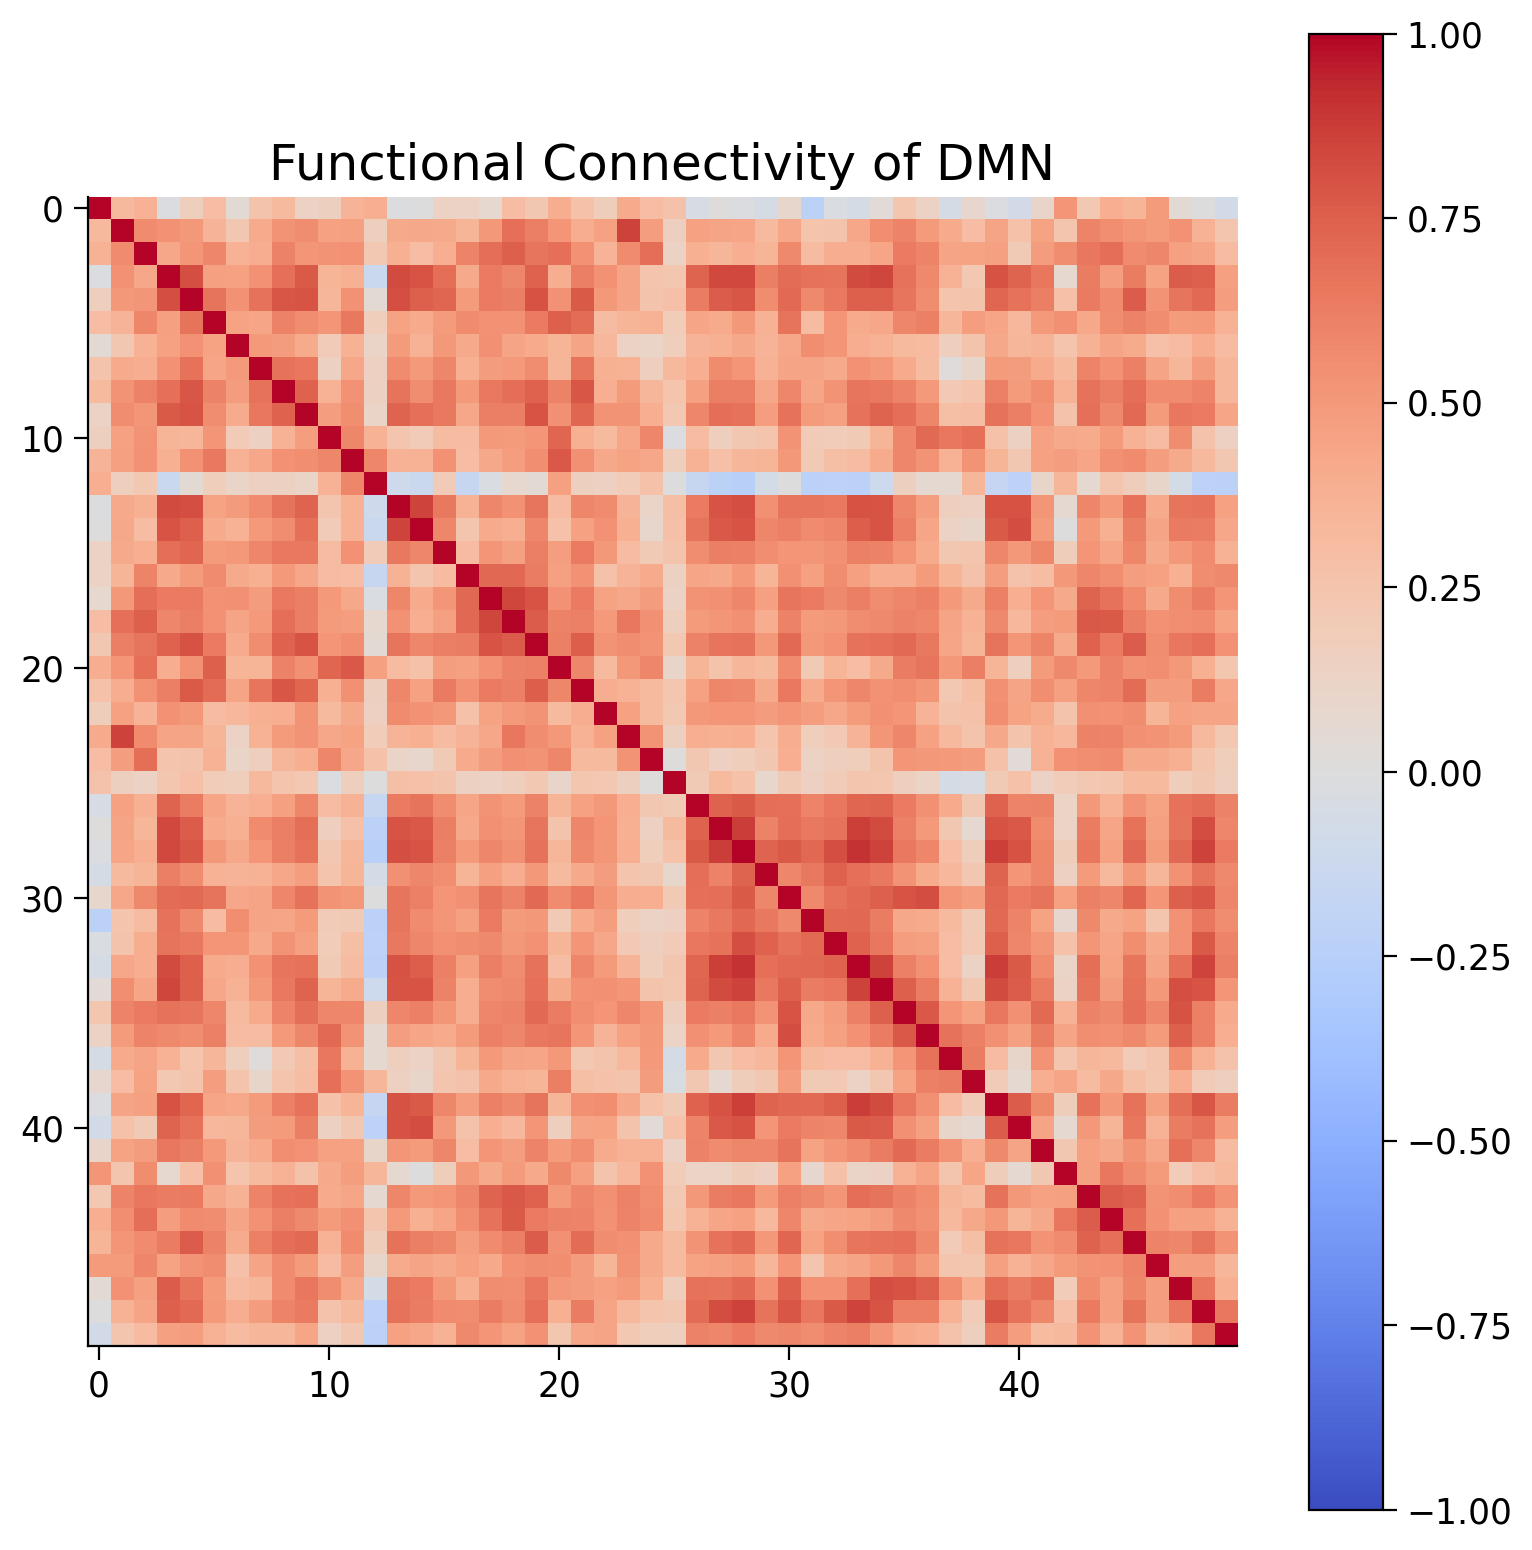

In [ ]:
subject = 0
timeseries_rest = load_timeseries(subject, name="rest", dir=os.path.join(HCP_DIR, "hcp_rest"))
timeseries_wm = load_timeseries(subject, name="wm", dir=os.path.join(HCP_DIR, "hcp_task"))
def calculate_fc(timeseries, indices):
    timeseries = timeseries[indices, :]
    correlation_matrix = np.corrcoef(timeseries)
    return correlation_matrix
fc_dmn = calculate_fc(timeseries_rest, DMN_INDEX)
fc_wmn = calculate_fc(timeseries_rest, WMN_INDEX)
def plot_connectivity_matrix(matrix, title):
    plt.figure(figsize=(8, 8))
    plt.imshow(matrix, vmin=-1, vmax=1, cmap='coolwarm')
    plt.colorbar()
    plt.title(title)
    plt.show()
plot_connectivity_matrix(fc_dmn, "Functional Connectivity of DMN")

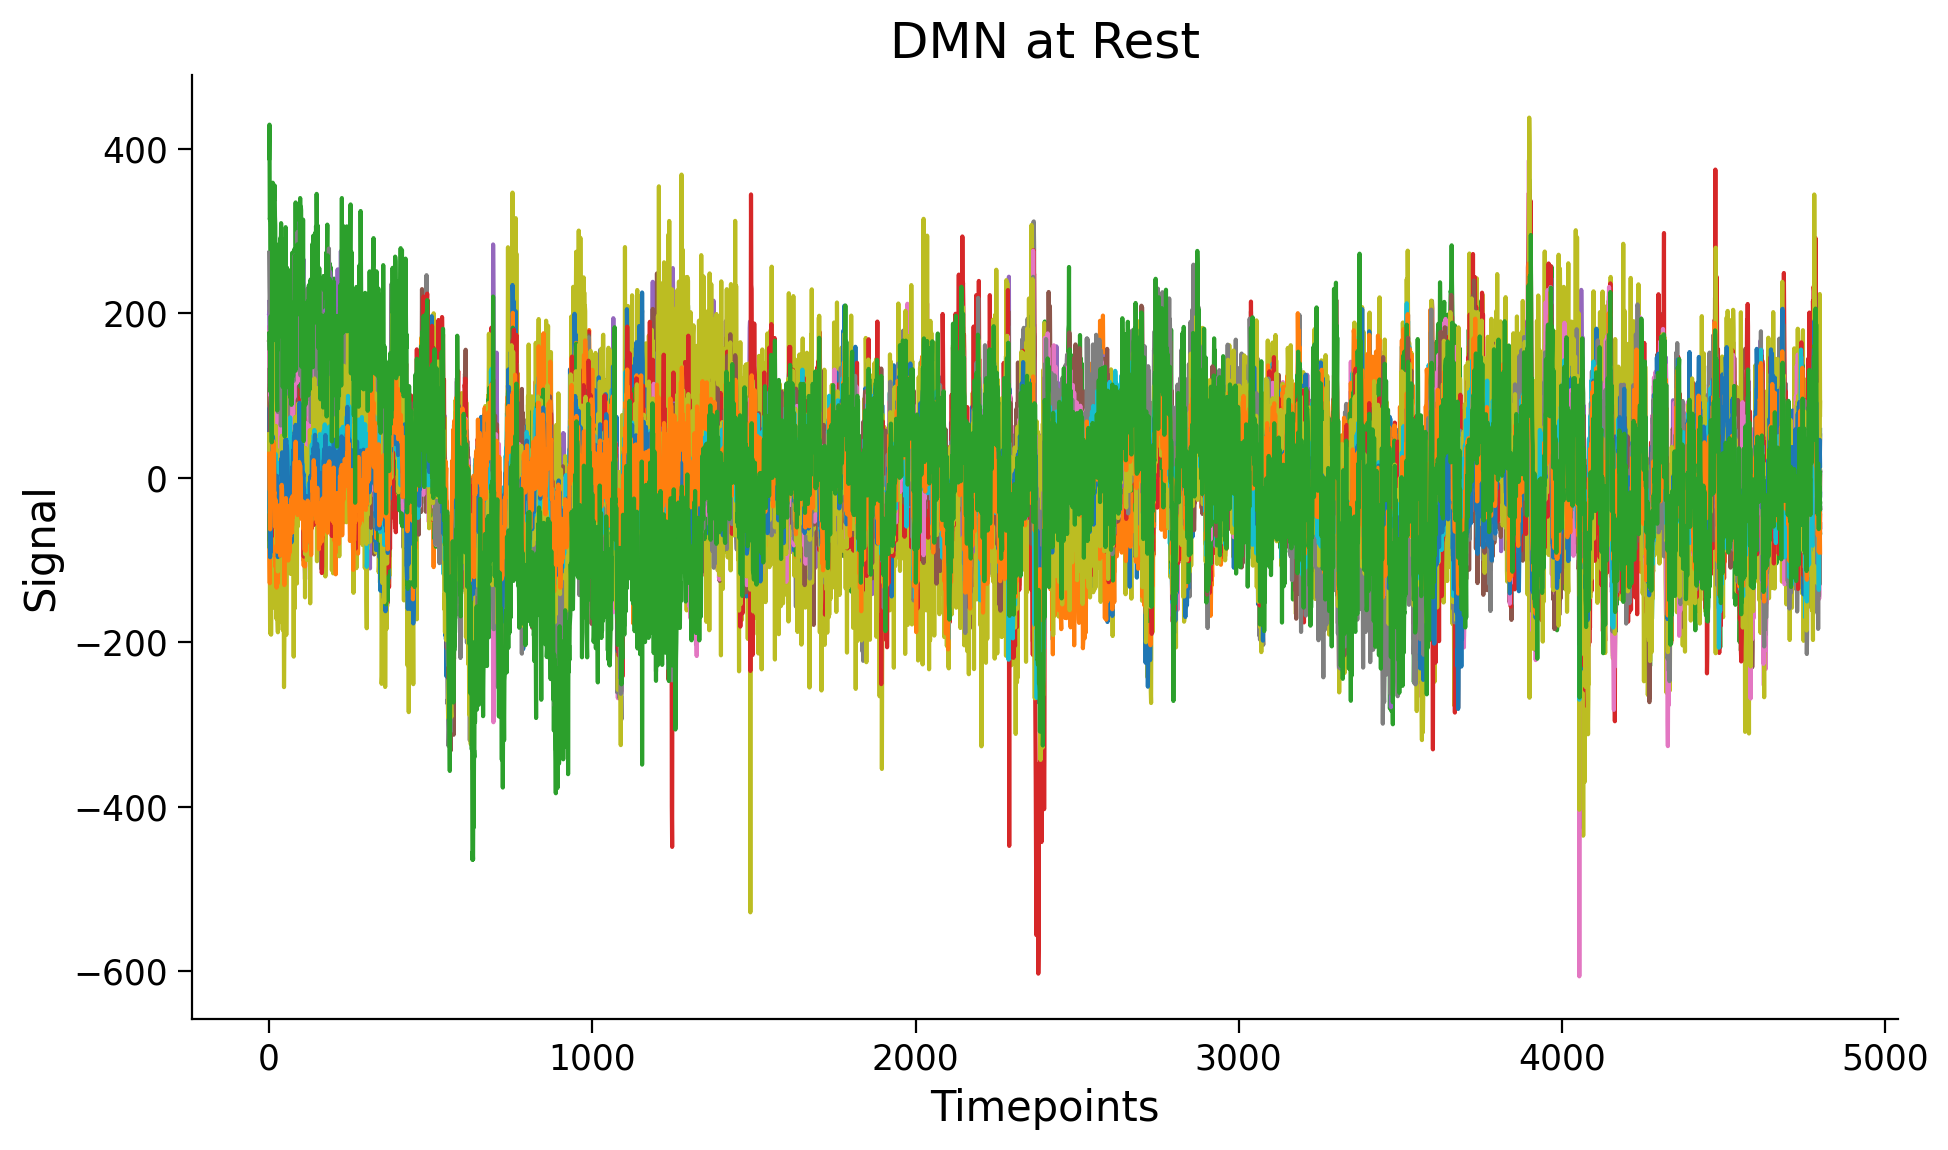

In [ ]:
dmn_rest_timeseries = timeseries_rest[DMN_INDEX, :]
plt.figure(figsize=(10, 6))
plt.plot(dmn_rest_timeseries.T)
plt.title("DMN at Rest")
plt.xlabel("Timepoints")
plt.ylabel("Signal")
plt.show()

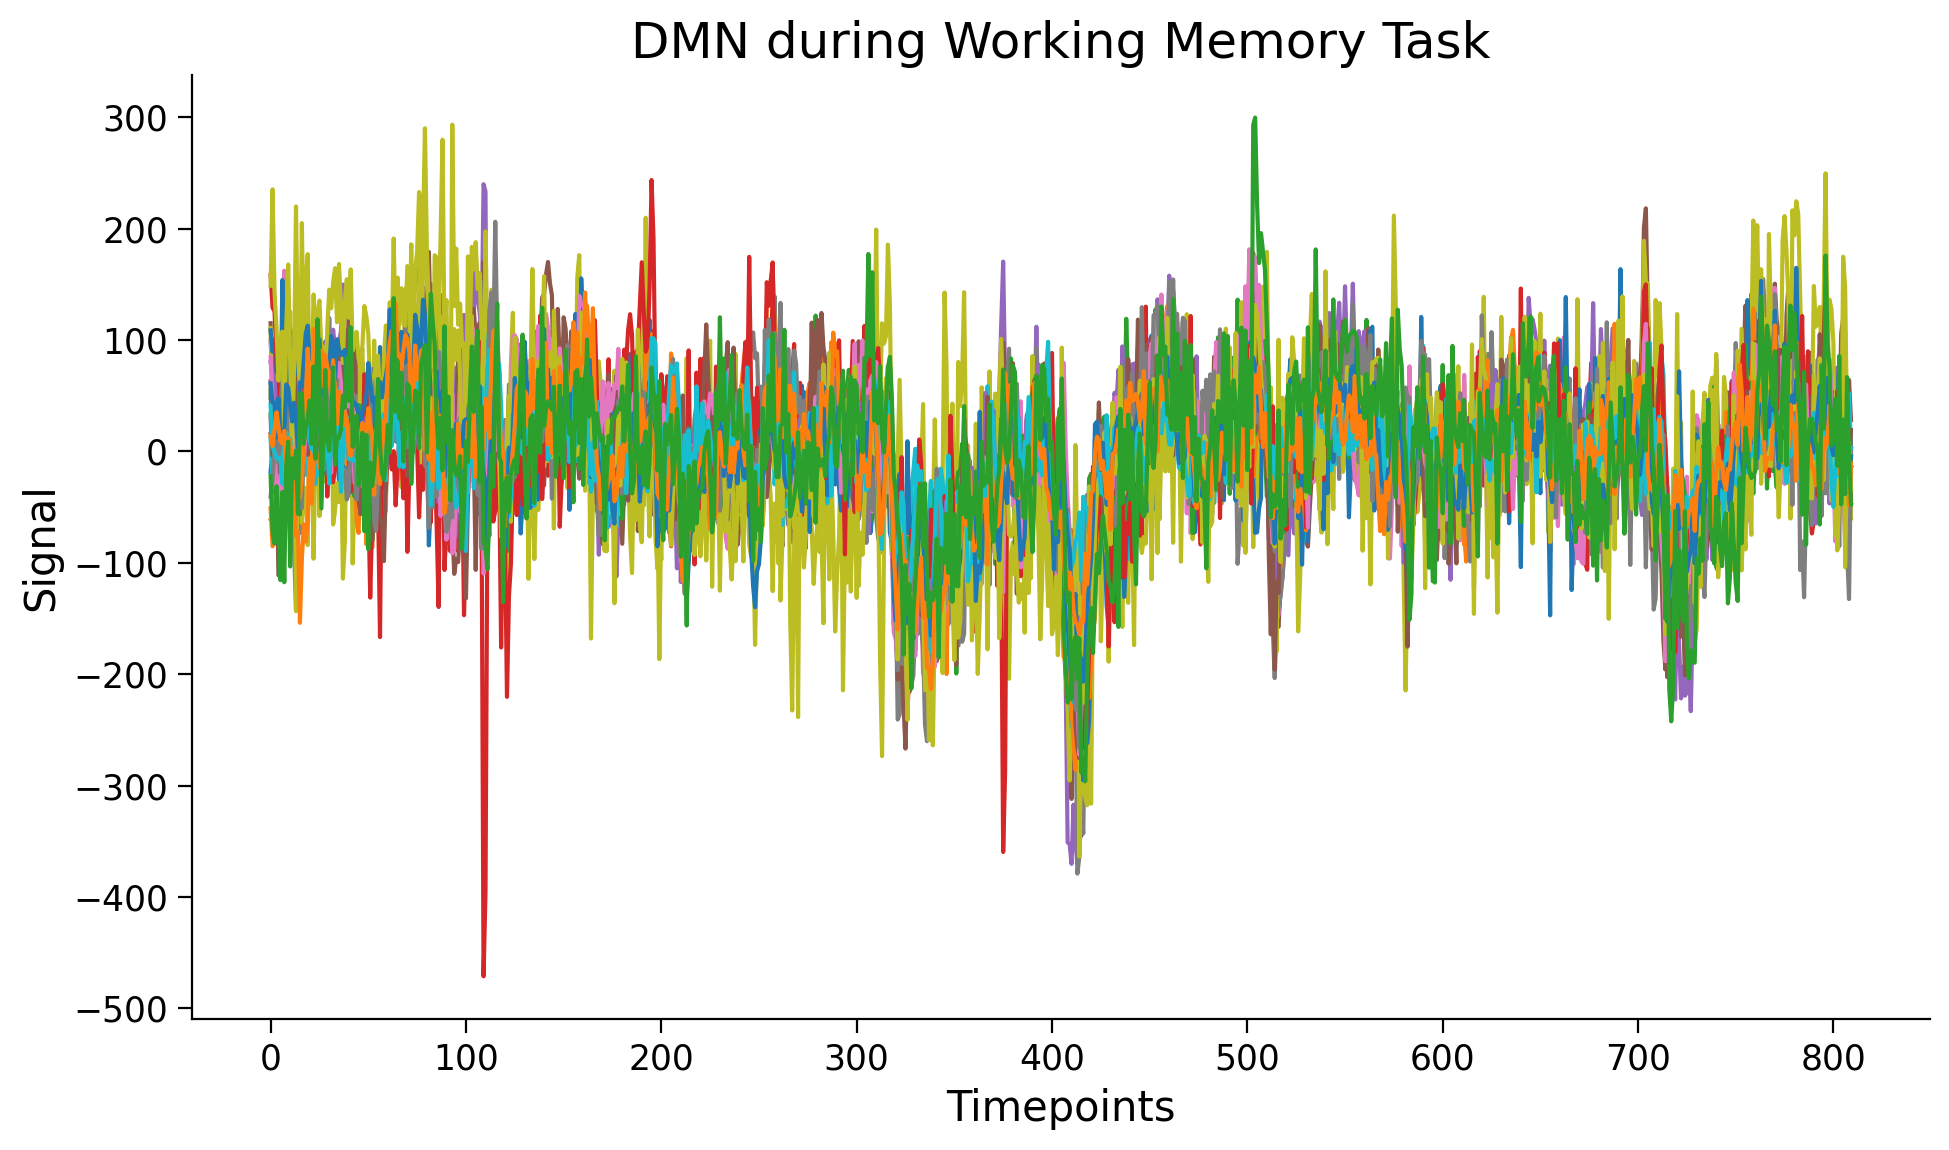

In [ ]:
dmn_wm_timeseries = timeseries_wm[DMN_INDEX, :]
plt.figure(figsize=(10, 6))
plt.plot(dmn_wm_timeseries.T)
plt.title("DMN during Working Memory Task")
plt.xlabel("Timepoints")
plt.ylabel("Signal")
plt.show()